<a href="https://colab.research.google.com/github/326eunjin/ai-team_project/blob/main/%EC%B5%9C%EC%A0%81%ED%99%94%EC%A0%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
import tensorflow as tf
from tensorflow.keras.models import clone_model
from tensorflow import keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
import plotly.graph_objects as go
from tensorflow.keras.utils import plot_model

In [2]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
# Preprocess the data
#y_train y_test 원래의 클래스의 레이블 정보 보존을 위해 따로 저장
y_train_origin = y_train
y_test_origin = y_test
x_train = x_train.astype('float32') / 255.0 #정규화
y_train = to_categorical(y_train) #one-hot encoding
x_test = x_test.astype('float32') / 255.0 #정규화
y_test = to_categorical(y_test) #one-hot encoding 

In [3]:
# #original model Test Accuracy:  0.7023000121116638
# model = tf.keras.models.Sequential([
#     Conv2D(32, 3, activation='relu', input_shape=(32, 32, 3), padding='same'),
#     MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'),
#     Conv2D(64, 3, activation='relu', padding='same'),
#     MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'),
#     Flatten(),
#     Dense(128, activation='relu'),
#     Dense(10, activation='softmax')
# ])
#layer 0.7267000079154968 0.7376999855041504
model = tf.keras.models.Sequential([
    Conv2D(32, 3, activation='relu', input_shape=(32, 32, 3), padding='same'),
    Conv2D(64, 3, activation='relu', input_shape=(32, 32, 3), padding='same'),
    MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'),
    Conv2D(128, 3, activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])
# #channel Test Accuracy:  0.7063999772071838
# model = tf.keras.models.Sequential([
#     Conv2D(64, 3, activation='relu', input_shape=(32, 32, 3), padding='same'),
#     MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'),
#     Conv2D(256, 3, activation='relu', padding='same'),
#     MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'),
#     Flatten(),
#     Dense(128, activation='relu'),
#     Dense(10, activation='softmax')
# ])
# #dense 늘리기 Test Accuracy:  0.7124000191688538
# model = tf.keras.models.Sequential([
#     Conv2D(64, 3, activation='relu', input_shape=(32, 32, 3), padding='same'),
#     MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'),
#     Conv2D(256, 3, activation='relu', padding='same'),
#     MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'),
#     Flatten(),
#     Dense(1024, activation='relu'),
#     Dense(256, activation='relu'),
#     Dense(10, activation='softmax')
# ])

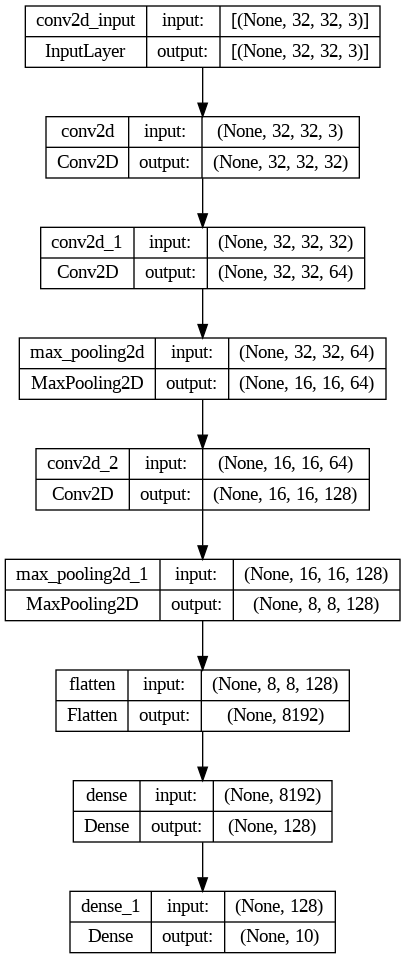

In [4]:
# model 시각화
plot_model(model, show_shapes=True)

In [5]:
features = model.predict(x_train)
# Apply PCA for dimensionality reduction of intermediate features
pca = PCA(n_components=3)
reduced_features = pca.fit_transform(features)
# reduced_features는 원래의 중간 특징 벡터보다 낮은 차원으로 표현된 특징 벡터입니다. 

1563/1563 [==============================] - 9s 4ms/step


In [6]:
# # Apply K-means clustering for manifold space learning and design loss function
# kmeans = KMeans(n_clusters=10, random_state=0)

# # kmeans.fit(reduced_features)
# kmeans.fit(model.predict(x_train))
# kmeans_labels = kmeans.labels_

# # Calculate centroids manually
# centroids = []
# for i in range(kmeans.n_clusters):
#     cluster_points = features[kmeans_labels == i]
#     centroid = np.mean(cluster_points, axis=0)
#     centroids.append(centroid)

# kmeans_loss = 0
# for i in range(len(y_train)):
#   min = float('int')
#   for j in range(10):
#     tmp = np.linalg.norm(y_train[i] - centroids[j], 2)
#     if min > tmp:
#       min 
#     kmeans_loss += distances

In [7]:
# # Apply K-means clustering for manifold space learning and design loss function
# kmeans = KMeans(n_clusters=10, random_state=0)
# tmp_model = clone_model(model)
# # kmeans.fit(reduced_features)
# kmeans.fit(tmp_model.predict(x_train))
# kmeans_labels = kmeans.labels_

# # Calculate centroids manually
# centroids = []
# for i in range(kmeans.n_clusters):
#     cluster_points = features[kmeans_labels == i]
#     centroid = np.mean(cluster_points, axis=0)
#     centroids.append(centroid)

# kmeans_loss = 0
# for i in range(len(y_train)):
#   min = float('INF')
#   for j in range(10):
#     tmp = np.linalg.norm(y_train[i] - centroids[j], 2)
#     min = tmp if min > tmp else min
#   kmeans_loss += min

In [8]:
# Apply K-means clustering for manifold space learning and design loss function
kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(features)
kmeans_labels = kmeans.labels_

# Calculate centroids manually
centroids = []
for i in range(kmeans.n_clusters):
    cluster_points = features[kmeans_labels == i]
    centroid = np.mean(cluster_points, axis=0)
    centroids.append(centroid)
kmeans_loss = [0 for _ in range(10)]
for i in range(len(y_train)):
  min = float('INF')
  for j in range(10):
    tmp = np.linalg.norm(y_train[i] - centroids[j], 2)
    min = tmp if min > tmp else min
  kmeans_loss[np.argmax(y_train[i])] += min

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [20]:
tf.config.run_functions_eagerly(True)

#Vol.1 Euclidean distance 지금 1등
def my_loss1(label, predict):
  tmp = 0
  np_label = np.array(label)
  for i in range(len(label)):
    tmp += kmeans_loss[np.argmax(np_label[i])]
  loss = tf.norm(label-predict,2)*tmp
  return loss


#Vol.2 Cosine similarity 나가리
def my_loss2(label, predict):
  cosine_similarity = tf.tensordot(label, tf.transpose(predict),axes=1)/(tf.norm(label,2)*tf.norm(predict,2))
  loss = 1 - cosine_similarity
  return loss * 100

#Vol.3 Manhattan distance
# Test Accuracy:  0.4722000062465668 그닥 좋지 않음 ㅠ_ㅠ
def my_loss3(label, predict):
  loss = tf.norm(label - predict,1)
  return loss



In [21]:
batch_size=64
model.compile(optimizer='adam',
              loss=my_loss1,
              metrics=['accuracy'])

In [22]:
log_dir = './logs/tensorflow'
tensorboard_cb=keras.callbacks.TensorBoard(log_dir)

In [23]:
model.fit(x_train, y_train, batch_size=batch_size, epochs=10, callbacks=[tensorboard_cb])
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('\nTest Accuracy: ',test_acc)
print('Test Loss: ',test_loss)

/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning:

Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.



Epoch 1/10
220/782 [=======>......................] - ETA: 29s - loss: 773998.0625 - accuracy: 0.9328

KeyboardInterrupt: ignored

In [13]:
# Apply PCA for dimensionality reduction of intermediate features 1
intermediate_model1 = Sequential(model.layers[:-2])
intermediate_features1 = intermediate_model1.predict(x_test)
reduced_intermediate_features1 = pca.fit_transform(intermediate_features1)

313/313 [==============================] - 2s 5ms/step


In [14]:
## Visualization of intermediate model 1 evaluation

# Create a trace for the scatter plot
scatter_trace = go.Scatter3d(
    x=reduced_intermediate_features1[:, 0],
    y=reduced_intermediate_features1[:, 1],
    z=reduced_intermediate_features1[:, 2],
    mode='markers',
    marker=dict(
        color=y_test_origin.flatten()*10,
        colorscale='Viridis',
        size=3,
        opacity=0.8
    )
)

# Create the layout
layout = go.Layout(
    scene=dict(
        xaxis=dict(title='Dimension 1'),
        yaxis=dict(title='Dimension 2'),
        zaxis=dict(title='Dimension 3')
    ),
    title='Visualization of intermediate model evaluation'
)

# Create the figure
fig = go.Figure(data=[scatter_trace], layout=layout)

# Resize the figure
fig.update_layout(width=800, height=800)

# Show the figure
fig.show()


In [15]:
# Apply PCA for dimensionality reduction of intermediate features
intermediate_model = Sequential(model.layers[:-1])
intermediate_features = intermediate_model.predict(x_test)
reduced_intermediate_features = pca.fit_transform(intermediate_features)

 10/313 [..............................] - ETA: 1s

/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning:

Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.



313/313 [==============================] - 2s 6ms/step


In [16]:
## Visualization of intermediate model evaluation

# Create a trace for the scatter plot
scatter_trace = go.Scatter3d(
    x=reduced_intermediate_features[:, 0],
    y=reduced_intermediate_features[:, 1],
    z=reduced_intermediate_features[:, 2],
    mode='markers',
    marker=dict(
        color=y_test_origin.flatten()*10,
        colorscale='Viridis',
        size=3,
        opacity=0.8
    )
)

# Create the layout
layout = go.Layout(
    scene=dict(
        xaxis=dict(title='Dimension 1'),
        yaxis=dict(title='Dimension 2'),
        zaxis=dict(title='Dimension 3')
    ),
    title='Visualization of intermediate model evaluation'
)

# Create the figure
fig = go.Figure(data=[scatter_trace], layout=layout)

# Resize the figure
fig.update_layout(width=800, height=800)

# Show the figure
fig.show()


In [17]:
# Apply PCA for dimensionality reduction of test features
test_features = model.predict(x_test)
reduced_test_features = pca.fit_transform(test_features)

  1/313 [..............................] - ETA: 16s

/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning:

Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.



313/313 [==============================] - 3s 10ms/step


In [18]:
## Visualization of model evaluation

# Create a trace for the scatter plot
scatter_trace = go.Scatter3d(
    x=reduced_test_features[:, 0],
    y=reduced_test_features[:, 1],
    z=reduced_test_features[:, 2],
    mode='markers',
    marker=dict(
        color=y_test_origin.flatten()*10,
        colorscale='Viridis',
        size=3,
        opacity=0.8
    )
)

# Create the layout
layout = go.Layout(
    scene=dict(
        xaxis=dict(title='Dimension 1'),
        yaxis=dict(title='Dimension 2'),
        zaxis=dict(title='Dimension 3')
    ),
    title='Visualization of model evaluation'
)

# Create the figure
fig = go.Figure(data=[scatter_trace], layout=layout)

# Resize the figure
fig.update_layout(width=800, height=800)

# Show the figure
fig.show()


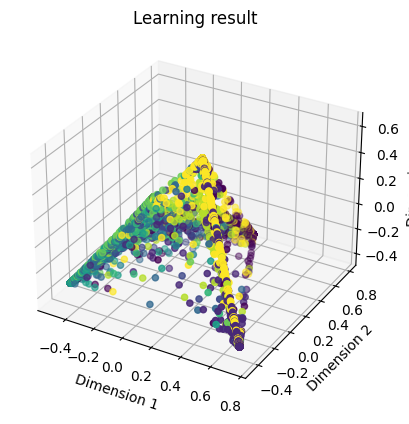

In [19]:
# Visualize 3D surface with K-means labels
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(reduced_test_features[:, 0], reduced_test_features[:, 1], reduced_test_features[:, 2], c=y_test_origin, cmap='viridis')
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_zlabel('Dimension 3')
plt.title('Learning result')
plt.show()